In [1]:
# import autosklearn.regression
import sklearn.model_selection
import sklearn.metrics
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<h2>02 Data Collection</h2>

In [3]:
df = []
src = r"C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\train\train"
for file in os.listdir(src):
    df.append(pd.read_csv(os.path.join(src,file)))
for i in df:
    print(list(i))
df = pd.concat(df)
df = df.fillna(0)
df[-10:]

['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน', '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1']
['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน', '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1']
['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน', '23SoilEC', '23SoilpH', '29SoilTension', 'flow1', '26N', '26P', '26K']
['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้

,index,time,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
104,12_105,04:40:16.090733+00,44.1,31.2,0.0,47.64,0.0,0.0,0.5,3.0,38.8,22.8,0.11,5.0,21.0,95.0,87.0,105.0,0.0
105,12_106,04:42:16.132055+00,44.2,31.2,0.0,49.50,0.0,0.0,0.1,1.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,111.0,0.0
106,12_107,04:44:16.107327+00,45.2,30.8,0.0,50.03,0.0,0.0,1.2,7.0,37.4,22.8,0.11,5.0,21.0,95.0,87.0,113.0,0.0
107,12_108,04:46:16.11276+00,45.9,32.0,0.0,50.06,0.0,0.0,0.6,1.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,110.0,0.0
108,12_109,04:48:16.120498+00,41.4,33.1,0.0,50.36,0.0,0.0,0.7,7.0,37.6,22.8,0.11,5.0,21.0,95.0,87.0,108.0,0.0
109,12_110,04:50:16.123489+00,43.0,33.0,0.0,52.30,0.0,0.0,1.0,5.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,109.0,0.0
110,12_111,04:52:18.185763+00,42.5,32.5,0.0,53.76,0.0,0.0,0.8,4.0,37.4,22.8,0.11,5.0,21.0,95.0,87.0,0.0,0.0
111,12_112,04:54:16.141528+00,41.7,33.1,0.0,54.86,0.0,0.0,0.8,4.0,37.4,22.8,0.11,5.1,21.0,95.0,87.0,109.0,0.0
112,12_113,04:56:20.078654+00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,104.0,0.0
113,12_114,04:58:16.116687+00,44.8,32.5,0.0,58.81,0.0,0.0,1.2,7.0,37.4,22.8,0.11,5.1,21.0,95.0,87.0,113.0,0.0


In [4]:
df.shape

(1111, 19)

In [5]:
df.columns

Index(['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh',
       '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed',
       '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน',
       '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1'],
      dtype='object')

In [6]:
df.describe(include='all')

,index,time,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
count,1111,1111,1111.000000,1111.000000,1111.000000,1111.000000,1111.0,1111.0,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
unique,1111,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,01_1,01:00:50.174233+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,49.581548,28.236184,20.820963,25.309307,0.0,0.0,0.734383,3.021602,42.186679,21.774077,0.118875,6.585329,20.355536,89.074707,82.429343,41.747075,0.411341
std,NaN,NaN,12.457318,4.691715,30.524152,24.089878,0.0,0.0,0.762373,2.263594,12.820314,1.824412,0.020832,1.159089,7.291150,30.236438,28.100947,33.303057,0.492298
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,41.400000,25.000000,0.000000,4.840000,0.0,0.0,0.000000,1.000000,34.300000,21.400000,0.110000,5.000000,21.000000,94.000000,87.000000,23.000000,0.000000
50%,NaN,NaN,47.000000,28.500000,0.000000,10.390000,0.0,0.0,0.600000,2.000000,37.600000,21.900000,0.110000,7.000000,21.000000,96.000000,89.000000,29.000000,0.000000
75%,NaN,NaN,55.300000,31.200000,65.530000,53.200000,0.0,0.0,1.100000,5.000000,45.200000,22.900000,0.120000,7.300000,23.000000,99.000000,92.000000,33.000000,1.000000


<hr>

<h4>03 Exploratory Data Analysis (EDA)</h4>

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1111 entries, 0 to 113
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1111 non-null   object 
 1   time                    1111 non-null   object 
 2   1Air Humidity           1111 non-null   float64
 3   1AirTemperature         1111 non-null   float64
 4   1LightHigh              1111 non-null   float64
 5   1LightLow               1111 non-null   float64
 6   11Rain Accumulate (mm)  1111 non-null   float64
 7   11Rain count            1111 non-null   float64
 8   12WindSpeed             1111 non-null   float64
 9   13WindDirection         1111 non-null   float64
 10  23SoilWC ค.ชื้นดิน      1111 non-null   float64
 11  23SoilTemp.อุณหภูมิดิน  1111 non-null   float64
 12  23SoilEC                1111 non-null   float64
 13  23SoilpH                1111 non-null   float64
 14  26N                     1111 non-null   float6

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1Air Humidity,1111.0,49.581548,12.457318,0.0,41.40,47.00,55.30,97.30
1AirTemperature,1111.0,28.236184,4.691715,0.0,25.00,28.50,31.20,38.40
1LightHigh,1111.0,20.820963,30.524152,0.0,0.00,0.00,65.53,65.53
1LightLow,1111.0,25.309307,24.089878,0.0,4.84,10.39,53.20,65.52
11Rain Accumulate (mm),1111.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
11Rain count,1111.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
12WindSpeed,1111.0,0.734383,0.762373,0.0,0.00,0.60,1.10,5.00
13WindDirection,1111.0,3.021602,2.263594,0.0,1.00,2.00,5.00,7.00
23SoilWC ค.ชื้นดิน,1111.0,42.186679,12.820314,0.0,34.30,37.60,45.20,80.20
23SoilTemp.อุณหภูมิดิน,1111.0,21.774077,1.824412,0.0,21.40,21.90,22.90,23.60


In [10]:
# # Pair Plot
# sns.pairplot(df)
# plt.show()

In [11]:
def remove_outliers(df):
    cleaned_data = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data

In [12]:
# Remove outliers from the dataset
df = remove_outliers(df)
df

,index,time,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
21,01_22,01:44:50.183143+00,75.1,28.1,0.00,46.37,0.0,0.0,0.0,0.0,51.4,23.5,0.12,8.3,23.0,101.0,94.0,23.0,1.0
49,01_50,02:40:50.233795+00,48.0,32.3,0.00,62.16,0.0,0.0,0.0,2.0,58.5,23.4,0.12,7.8,25.0,104.0,97.0,22.0,0.0
50,01_51,02:42:50.232726+00,45.7,33.0,0.00,61.97,0.0,0.0,0.0,4.0,57.9,23.3,0.12,7.8,25.0,103.0,96.0,21.0,0.0
51,01_52,02:44:50.259068+00,44.8,34.4,0.00,62.74,0.0,0.0,0.0,2.0,53.3,23.4,0.12,7.8,25.0,103.0,96.0,21.0,0.0
52,01_53,02:46:50.262598+00,45.5,34.4,0.00,63.44,0.0,0.0,0.0,3.0,52.1,23.4,0.12,7.8,24.0,103.0,96.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,08_113,04:39:08.909415+00,35.6,37.9,65.53,2.46,0.0,0.0,0.4,4.0,37.4,21.8,0.11,6.7,21.0,94.0,87.0,23.0,0.0
113,08_114,04:41:08.913736+00,33.8,38.2,65.53,2.99,0.0,0.0,0.2,0.0,36.9,21.8,0.11,6.7,21.0,94.0,87.0,24.0,0.0
114,08_115,04:43:08.879486+00,34.3,38.4,65.53,1.92,0.0,0.0,0.2,2.0,36.9,21.8,0.11,6.6,21.0,94.0,87.0,24.0,0.0
115,08_116,04:45:08.87669+00,37.3,36.5,65.53,1.77,0.0,0.0,0.3,1.0,36.9,21.8,0.11,6.7,21.0,94.0,87.0,23.0,0.0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1Air Humidity,568.0,47.864613,9.738520,32.30,39.30,46.700,54.6250,75.40
1AirTemperature,568.0,28.082394,4.691330,17.70,24.50,27.600,31.6000,38.40
1LightHigh,568.0,30.688345,32.727947,0.00,0.00,0.000,65.5300,65.53
1LightLow,568.0,15.892289,21.192172,0.00,2.93,6.655,12.8525,65.52
11Rain Accumulate (mm),568.0,0.000000,0.000000,0.00,0.00,0.000,0.0000,0.00
11Rain count,568.0,0.000000,0.000000,0.00,0.00,0.000,0.0000,0.00
12WindSpeed,568.0,0.671831,0.651831,0.00,0.00,0.600,1.1000,2.70
13WindDirection,568.0,3.098592,2.253932,0.00,1.00,3.000,5.0000,7.00
23SoilWC ค.ชื้นดิน,568.0,38.159859,5.845130,29.80,35.00,37.250,40.6000,61.20
23SoilTemp.อุณหภูมิดิน,568.0,21.410211,1.015194,19.90,20.50,21.600,22.0000,23.50


In [14]:
# # Pair Plot
# sns.pairplot(df)
# plt.show()

<h4>04 Feature Engineering</h4>

In [15]:
df.columns

Index(['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh',
       '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed',
       '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน',
       '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1'],
      dtype='object')

In [16]:
df

,index,time,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
21,01_22,01:44:50.183143+00,75.1,28.1,0.00,46.37,0.0,0.0,0.0,0.0,51.4,23.5,0.12,8.3,23.0,101.0,94.0,23.0,1.0
49,01_50,02:40:50.233795+00,48.0,32.3,0.00,62.16,0.0,0.0,0.0,2.0,58.5,23.4,0.12,7.8,25.0,104.0,97.0,22.0,0.0
50,01_51,02:42:50.232726+00,45.7,33.0,0.00,61.97,0.0,0.0,0.0,4.0,57.9,23.3,0.12,7.8,25.0,103.0,96.0,21.0,0.0
51,01_52,02:44:50.259068+00,44.8,34.4,0.00,62.74,0.0,0.0,0.0,2.0,53.3,23.4,0.12,7.8,25.0,103.0,96.0,21.0,0.0
52,01_53,02:46:50.262598+00,45.5,34.4,0.00,63.44,0.0,0.0,0.0,3.0,52.1,23.4,0.12,7.8,24.0,103.0,96.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,08_113,04:39:08.909415+00,35.6,37.9,65.53,2.46,0.0,0.0,0.4,4.0,37.4,21.8,0.11,6.7,21.0,94.0,87.0,23.0,0.0
113,08_114,04:41:08.913736+00,33.8,38.2,65.53,2.99,0.0,0.0,0.2,0.0,36.9,21.8,0.11,6.7,21.0,94.0,87.0,24.0,0.0
114,08_115,04:43:08.879486+00,34.3,38.4,65.53,1.92,0.0,0.0,0.2,2.0,36.9,21.8,0.11,6.6,21.0,94.0,87.0,24.0,0.0
115,08_116,04:45:08.87669+00,37.3,36.5,65.53,1.77,0.0,0.0,0.3,1.0,36.9,21.8,0.11,6.7,21.0,94.0,87.0,23.0,0.0


<h5>Feature Importance</h5>

In [17]:
df.shape

(568, 19)

In [18]:
dfx = df
list(dfx)

['index',
 'time',
 '1Air Humidity',
 '1AirTemperature',
 '1LightHigh',
 '1LightLow',
 '11Rain Accumulate (mm)',
 '11Rain count',
 '12WindSpeed',
 '13WindDirection',
 '23SoilWC ค.ชื้นดิน',
 '23SoilTemp.อุณหภูมิดิน',
 '23SoilEC',
 '23SoilpH',
 '26N',
 '26P',
 '26K',
 '29SoilTension',
 'flow1']

In [19]:
dfx = dfx.drop(['index','time','11Rain Accumulate (mm)','11Rain count'],axis=1)

In [20]:
dfx.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
1Air Humidity,1.0,-0.6864,-0.5912,-0.1602,-0.113,-0.08394,-0.1843,0.1519,-0.07761,-0.01946,-0.12,-0.102,-0.1058,0.3544,0.4695
1AirTemperature,-0.6864,1.0,0.4786,0.0571,-0.2407,0.1268,0.3227,0.4598,0.1113,0.2015,0.381,0.3651,0.3637,-0.5419,-0.4221
1LightHigh,-0.5912,0.4786,1.0,-0.4956,0.2242,-0.02699,0.04584,0.04864,-0.01923,0.2419,0.1436,0.08823,0.1112,-0.5386,-0.4593
1LightLow,-0.1602,0.0571,-0.4956,1.0,0.01673,-0.01426,0.2213,-0.14,0.1664,-0.1909,0.1215,0.1319,0.1226,0.1455,-0.02137
12WindSpeed,-0.113,-0.2407,0.2242,0.01673,1.0,-0.01827,-0.06725,-0.2704,0.01206,-0.03756,-0.103,-0.1124,-0.1051,-0.006826,-0.0101
13WindDirection,-0.08394,0.1268,-0.02699,-0.01426,-0.01827,1.0,0.08436,0.06515,0.09482,-0.0739,0.0005585,0.00222,0.02956,0.0559,0.01407
23SoilWC ค.ชื้นดิน,-0.1843,0.3227,0.04584,0.2213,-0.06725,0.08436,1.0,0.3139,0.7221,0.02623,0.636,0.7294,0.7171,-0.1545,-0.171
23SoilTemp.อุณหภูมิดิน,0.1519,0.4598,0.04864,-0.14,-0.2704,0.06515,0.3139,1.0,0.1584,0.6606,0.6513,0.6471,0.653,-0.5026,-0.02591
23SoilEC,-0.07761,0.1113,-0.01923,0.1664,0.01206,0.09482,0.7221,0.1584,1.0,-0.06099,0.346,0.4227,0.4302,0.1458,0.1491
23SoilpH,-0.01946,0.2015,0.2419,-0.1909,-0.03756,-0.0739,0.02623,0.6606,-0.06099,1.0,0.6031,0.5394,0.5679,-0.6401,-0.1244


<ol>
    <li>26P             0.7294</li>
    <li>23SoilEC        0.7221	</li>
    <li>26K             0.7171</li>
    <li>26N             0.636</li>
    <li>1AirTemperature 0.3227</li>
    <li>1LightLow       0.2213</li>
    <li>13WindDirection	       0.08436</li>
    <li>1LightHigh       0.04584</li>
    <li>23SoilpH	       0.02623</li>
</ol>

In [21]:
# ['index',
#  'time',
#  '1Air Humidity',
#  '1AirTemperature',
#  '1LightHigh',
#  '1LightLow',
#  '11Rain Accumulate (mm)',
#  '11Rain count',
#  '12WindSpeed',
#  '13WindDirection',
#  '23SoilWC ค.ชื้นดิน',
#  '23SoilTemp.อุณหภูมิดิน',
#  '23SoilEC',
#  '23SoilpH',
#  '26N',
#  '26P',
#  '26K',
#  '29SoilTension',
#  'flow1']

In [22]:
# X = dfx[['1Air Humidity', '1AirTemperature', '1LightHigh',
#                 '1LightLow','12WindSpeed',
#                 '23SoilEC', '23SoilpH', '23SoilTemp.อุณหภูมิดิน',  '26N', '26P', '26K',
#                 '29SoilTension', 'flow1']]
# X = dfx[['23SoilEC','26N', '26P', '26K']]                               # 'XGBoost': 1.8323655424062268,
# X = dfx[['26P','23SoilEC','26K','26N','1AirTemperature','1LightLow','1Air Humidity','29SoilTension']]     #'Random Forest Regressor': 0.9620124891807517,
# X = dfx[['26P','23SoilEC','26K','26N','1AirTemperature','1LightLow','1LightHigh','12WindSpeed','23SoilEC','1Air Humidity']]    #'Gradient Boosting Regression': 0.9354620662153148,
# X = dfx[['26P','23SoilEC','26K','26N','1AirTemperature','1LightLow','13WindDirection','1LightHigh','23SoilpH']]                # 'Gradient Boosting Regression': 0.9299517774560928,
# X = dfx[['26P','23SoilpH','26K','26N','1AirTemperature','1LightLow']]   # 'Random Forest Regressor': 0.915041715399611,
# X = dfx[['26P','23SoilpH','26K','26N','1AirTemperature','1LightLow','1LightHigh','12WindSpeed','23SoilEC','1Air Humidity']]      #'Random Forest Regressor': 0.9163478324013863,
# X = dfx[['26P','23SoilEC','26K','26N','1AirTemperature','1LightLow','13WindDirection','1LightHigh','23SoilpH']]     # 'Random Forest Regressor': 0.909251656920075,
# X = dfx[['26P','23SoilEC','26K','26N','1AirTemperature','1LightLow','13WindDirection','1LightHigh','23SoilpH','1Air Humidity',]]     #'Random Forest Regressor': 0.8952446114119522,
# X = dfx[['26P','23SoilEC','26K','26N','1AirTemperature','1LightLow','13WindDirection','1LightHigh','23SoilpH','1Air Humidity','29SoilTension']]     #'XGBoost': 0.8941731369286253,
X = dfx[['26P','23SoilEC','26K','26N','1AirTemperature','1LightLow','13WindDirection','1LightHigh','23SoilpH','1Air Humidity','29SoilTension','flow1']]      #'XGBoost': 0.8837198268600372,
 

y = df[['23SoilWC ค.ชื้นดิน']]

In [23]:
X

,26P,23SoilEC,26K,26N,1AirTemperature,1LightLow,13WindDirection,1LightHigh,23SoilpH,1Air Humidity,29SoilTension,flow1
21,101.0,0.12,94.0,23.0,28.1,46.37,0.0,0.00,8.3,75.1,23.0,1.0
49,104.0,0.12,97.0,25.0,32.3,62.16,2.0,0.00,7.8,48.0,22.0,0.0
50,103.0,0.12,96.0,25.0,33.0,61.97,4.0,0.00,7.8,45.7,21.0,0.0
51,103.0,0.12,96.0,25.0,34.4,62.74,2.0,0.00,7.8,44.8,21.0,0.0
52,103.0,0.12,96.0,24.0,34.4,63.44,3.0,0.00,7.8,45.5,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112,94.0,0.11,87.0,21.0,37.9,2.46,4.0,65.53,6.7,35.6,23.0,0.0
113,94.0,0.11,87.0,21.0,38.2,2.99,0.0,65.53,6.7,33.8,24.0,0.0
114,94.0,0.11,87.0,21.0,38.4,1.92,2.0,65.53,6.6,34.3,24.0,0.0
115,94.0,0.11,87.0,21.0,36.5,1.77,1.0,65.53,6.7,37.3,23.0,0.0


In [24]:
y

,23SoilWC ค.ชื้นดิน
21,51.4
49,58.5
50,57.9
51,53.3
52,52.1
...,...
112,37.4
113,36.9
114,36.9
115,36.9


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)
X_train.shape, X_test.shape

((397, 12), (171, 12))

<h4>Scaling?</h4>

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
cols = X_train.columns

In [29]:
X_train

,26P,23SoilEC,26K,26N,1AirTemperature,1LightLow,13WindDirection,1LightHigh,23SoilpH,1Air Humidity,29SoilTension,flow1
4,93.0,0.11,86.0,20.0,17.9,7.67,2.0,0.00,7.0,66.1,30.0,0.0
101,95.0,0.11,87.0,21.0,36.9,3.05,4.0,65.53,6.6,36.8,24.0,0.0
33,99.0,0.12,91.0,22.0,26.2,4.17,7.0,65.53,7.1,46.5,31.0,1.0
28,95.0,0.11,87.0,21.0,19.6,34.65,1.0,0.00,7.1,60.4,30.0,1.0
81,94.0,0.11,87.0,21.0,24.2,4.37,2.0,65.53,7.1,50.1,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112,96.0,0.11,88.0,21.0,31.9,4.92,3.0,65.53,7.4,36.6,23.0,0.0
13,96.0,0.11,89.0,21.0,24.8,10.37,7.0,0.00,7.6,51.5,28.0,1.0
79,97.0,0.11,89.0,22.0,28.8,61.47,1.0,0.00,7.2,40.0,25.0,0.0
99,96.0,0.11,88.0,21.0,31.2,64.28,1.0,0.00,7.4,36.5,22.0,0.0


In [30]:
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [31]:
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])

<hr>

<h4>05 Model Selection</h4>

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from pygam import LinearGAM, s, f
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


In [33]:
# 07 Decision Tree Regression
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}
dt_grid_search = GridSearchCV(DecisionTreeRegressor(), dt_param_grid, cv=5, scoring='neg_mean_absolute_error')
dt_grid_search.fit(X_train, y_train)
dt_best = dt_grid_search.best_estimator_
dt_predictions = dt_best.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f'Decision Tree MSE: {dt_mae}, Best Params: {dt_grid_search.best_params_}')

#####################################################################################################################################
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error

# # Expanded hyperparameter grid
# dt_param_grid = {
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 10, 20, 30],
#     'min_samples_leaf': [1, 2, 4, 6],  # Minimum number of samples required at each leaf node
#     'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
#     'ccp_alpha': [0.0, 0.01, 0.1]  # Complexity parameter used for Minimal Cost-Complexity Pruning
# }

# # Grid Search with Cross-Validation
# dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=5, scoring='neg_mean_absolute_error')
# dt_grid_search.fit(X_train, y_train)

# # Best model and predictions
# dt_best = dt_grid_search.best_estimator_
# dt_predictions = dt_best.predict(X_test)

# # Evaluate performance
# dt_mae = mean_absolute_error(y_test, dt_predictions)
# print(f'Decision Tree MAE: {dt_mae}, Best Params: {dt_grid_search.best_params_}')



Decision Tree MSE: 1.0258423837371209, Best Params: {'max_depth': 30, 'min_samples_split': 10}


In [34]:
# 08 Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}
rfr_grid_search = GridSearchCV(rfr, rfr_param_grid, cv=5, scoring='neg_mean_absolute_error')
rfr_grid_search.fit(X_train, y_train)
rfr_best = rfr_grid_search.best_estimator_
rfr_predictions = rfr_best.predict(X_test)
rfr_mae = mean_absolute_error(y_test, rfr_predictions)
print("Random Forest Regressor mae:", rfr_mae)

#####################################################################################################################################
# # Enhanced hyperparameter grid
# rfr_param_grid = {
#     'n_estimators': [100, 200, 300],  # More options for the number of trees
#     'max_depth': [None, 5, 10, 20],  # Additional depth options for tree growth
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
# }

# # Grid Search with Cross-Validation
# rfr_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rfr_param_grid, cv=5, scoring='neg_mean_absolute_error')
# rfr_grid_search.fit(X_train, y_train)

# # Best model and predictions
# rfr_best = rfr_grid_search.best_estimator_
# rfr_predictions = rfr_best.predict(X_test)

# # Evaluate performance
# rfr_mae = mean_absolute_error(y_test, rfr_predictions)
# print(f'Random Forest Regressor MAE: {rfr_mae}, Best Params: {rfr_grid_search.best_params_}')


Random Forest Regressor mae: 0.8842105263157914


In [35]:
# 09 Gradient Boosting Regression (XGBoost)
import xgboost as xgb

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9]
}
xgb_grid_search = GridSearchCV(xgb.XGBRegressor(), xgb_param_grid, cv=5, scoring='neg_mean_absolute_error')
xgb_grid_search.fit(X_train, y_train)
xgb_best = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print(f'XGBoost MSE: {xgb_mae}, Best Params: {xgb_grid_search.best_params_}')
#####################################################################################################################################
# # Extended hyperparameter grid
# xgb_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 6, 9, 12],
#     'subsample': [0.6, 0.8, 1.0],  # Fraction of observations to be randomly sampled for each tree.
#     'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features to be randomly sampled for each tree.
#     'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node.
# }

# # Grid Search with Cross-Validation
# xgb_grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), xgb_param_grid, cv=5, scoring='neg_mean_absolute_error')
# xgb_grid_search.fit(X_train, y_train)

# # Best model and predictions
# xgb_best = xgb_grid_search.best_estimator_
# xgb_predictions = xgb_best.predict(X_test)

# # Evaluate performance
# xgb_mae = mean_absolute_error(y_test, xgb_predictions)
# print(f'XGBoost MAE: {xgb_mae}, Best Params: {xgb_grid_search.best_params_}')


XGBoost MSE: 0.8837198268600372, Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


In [36]:
# Gradient Boosting Regression Trees
gbrt = GradientBoostingRegressor()
gbrt_param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.05, 0.1, 0.2]
    }
gbrt_grid_search = GridSearchCV(gbrt, gbrt_param_grid, cv=5, scoring='neg_mean_absolute_error')
gbrt_grid_search.fit(X_train, y_train)
gbrt_best = gbrt_grid_search.best_estimator_
gbrt_predictions = gbrt_best.predict(X_test)
gbrt_mae = mean_absolute_error(y_test, gbrt_predictions)
print(f"{gbrt_mae} Gradient Boosting Regression")


0.9271776535827335 Gradient Boosting Regression


In [37]:
# 10 Gradient Boosting Regression (LightGBM)
import lightgbm as lgb


lgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9],
    'num_leaves': [31, 62, 127]
}
lgb_grid_search = GridSearchCV(lgb.LGBMRegressor(), lgb_param_grid, cv=5, scoring='neg_mean_absolute_error')
lgb_grid_search.fit(X_train, y_train)
lgb_best = lgb_grid_search.best_estimator_
lgb_predictions = lgb_best.predict(X_test)
lgb_mae = mean_absolute_error(y_test, lgb_predictions)

print(f"{lgb_mae} Gradient Boosting Regression")
# #####################################################################################################################################
# # Expanded hyperparameter grid
# lgb_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 6, 9, -1],
#     'num_leaves': [31, 62, 127, 255],
#     'min_child_samples': [20, 30, 40],  # Minimum number of data needed in a child (leaf)
#     'feature_fraction': [0.8, 0.9, 1.0],  # LightGBM will randomly select a subset of features on each iteration if feature_fraction is smaller than 1.0
#     'lambda_l1': [0, 1e-1, 1, 10],  # L1 regularization
#     'lambda_l2': [0, 1e-1, 1, 10]  # L2 regularization
# }

# # Grid Search with Cross-Validation
# lgb_grid_search = GridSearchCV(lgb.LGBMRegressor(random_state=42), lgb_param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)
# lgb_grid_search.fit(X_train, y_train)

# # Best model and predictions
# lgb_best = lgb_grid_search.best_estimator_
# lgb_predictions = lgb_best.predict(X_test)

# # Evaluate performance
# lgb_mae = mean_absolute_error(y_test, lgb_predictions)
# print(f'LightGBM Gradient Boosting Regression MAE: {lgb_mae}, Best Params: {lgb_grid_search.best_params_}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 317, number of used features: 12
[LightGBM] [Info] Start training from score 38.226183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 318, number of used features: 12
[LightGBM] [Info] Start training from score 38.286793
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [38]:
# K-Nearest Neighbors Regression (KNN)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='neg_mean_absolute_error')
knn_grid_search.fit(X_train, y_train)
knn_best = knn_grid_search.best_estimator_
knn_predictions = knn_best.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_predictions)
print(f'KNN Regression MAE: {knn_mae}, Best Params: {knn_grid_search.best_params_}')

#####################################################################################################################################
# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Optionally apply PCA for dimensionality reduction
# # pca = PCA(n_components='mle')  # mle lets PCA decide the number of components to keep
# # X_train_scaled = pca.fit_transform(X_train_scaled)
# # X_test_scaled = pca.transform(X_test_scaled)

# # Expanded hyperparameter grid
# knn_param_grid = {
#     'n_neighbors': range(1, 10),  # Consider testing a broader range of neighbors
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     # 'metric': ['euclidean', 'manhattan', 'minkowski'],  # Optional: Explore different distance metrics
# }

# # Grid Search with Cross-Validation
# knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='neg_mean_absolute_error')
# knn_grid_search.fit(X_train_scaled, y_train)

# # Best model and predictions
# knn_best = knn_grid_search.best_estimator_
# knn_predictions = knn_best.predict(X_test_scaled)

# # Evaluate performance
# knn_mae = mean_absolute_error(y_test, knn_predictions)
# print(f'KNN Regression MAE: {knn_mae}, Best Params: {knn_grid_search.best_params_}')


KNN Regression MAE: 1.0738030682237627, Best Params: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [39]:
# # # 12 Neural Network Regression
# from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler

# nn_param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50,50)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'solver': ['adam', 'lbfgs']
# }
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# nn_grid_search = GridSearchCV(MLPRegressor(max_iter=1000), nn_param_grid, cv=5, scoring='neg_mean_absolute_error')
# nn_grid_search.fit(X_train_scaled, y_train)
# nn_best = nn_grid_search.best_estimator_
# nn_predictions = nn_best.predict(X_test_scaled)
# nn_mae = mean_absolute_error(y_test, nn_predictions)
# print(f'Neural Network Regression MAE: {nn_mae}, Best Params: {nn_grid_search.best_params_}')

# #####################################################################################################################################
# # # Expanded hyperparameter grid
# # nn_param_grid = {
# #     'hidden_layer_sizes': [(50,), (100,), (50,50), (100, 100), (50, 100, 50)],
# #     'activation': ['relu', 'tanh', 'logistic'],
# #     'solver': ['adam', 'lbfgs'],
# #     'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term) parameter.
# #     'learning_rate_init': [0.001, 0.01, 0.1],  # The initial learning rate used.
# # }

# # # Scale features
# # scaler = StandardScaler().fit(X_train)
# # X_train_scaled = scaler.transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # # Early stopping setup
# # early_stopping = {'n_iter_no_change': 10, 'validation_fraction': 0.1, 'tol': 0.001}

# # # Grid Search with Cross-Validation
# # nn_grid_search = GridSearchCV(MLPRegressor(max_iter=1000, **early_stopping), nn_param_grid, cv=5, scoring='neg_mean_absolute_error')
# # nn_grid_search.fit(X_train_scaled, y_train)

# # # Best model and predictions
# # nn_best = nn_grid_search.best_estimator_
# # nn_predictions = nn_best.predict(X_test_scaled)

# # # Evaluate performance
# # nn_mae = mean_absolute_error(y_test, nn_predictions)
# # print(f'Neural Network Regression MAE: {nn_mae}, Best Params: {nn_grid_search.best_params_}')


In [40]:
# print(f'{lr_mae} Linear Regression MAE: ')
# print(f'{poly_mae} Polynomial Regression MSE: , Best Degree: {poly_grid_search.best_params_["polynomialfeatures__degree"]}')
# print(f'{ridge_mae} Ridge Regression MSE: , Best Alpha: {ridge_grid_search.best_params_["alpha"]}')
# print(f'{lasso_mae} Lasso Regression MSE: , Best Alpha: {lasso_grid_search.best_params_["alpha"]}')
# print(f"{enr_mae}Elastic Net Regression MSE:")
# print(f'{svr_mae} SVR MSE: , Best Params: {svr_grid_search.best_params_}')
print(f'{dt_mae} Decision Tree MSE: , Best Params: {dt_grid_search.best_params_}')
print(f"{rfr_mae} Random Forest Regressor mae:", )
print(f'{xgb_mae} XGBoost MSE: , Best Params: {xgb_grid_search.best_params_}')

print(f"{gbrt_mae} Gradient Boosting Regression2")
print(f"{lgb_mae} Gradient Boosting Regression2")

# print(f'{gpr_mae} Gaussian Process Regression MAE: ')
print(f'{knn_mae} Best KNN Model MAE:  Best Parameters: {knn_grid_search.best_params_}')
# print(f'{nn_mae} Neural Network Regression MAE: , Best Params: {nn_grid_search.best_params_}')
# print(f'{qr_mae} Quantile Regression MAE: ')
# print(f"{mlr_mae}Multiple Linear Regression MSE:")
# print(f"{gbrt_mae}Gradient Boosting Regression Trees MSE:")

1.0258423837371209 Decision Tree MSE: , Best Params: {'max_depth': 30, 'min_samples_split': 10}
0.8842105263157914 Random Forest Regressor mae:
0.8837198268600372 XGBoost MSE: , Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
0.9271776535827335 Gradient Boosting Regression2
0.9420533026087639 Gradient Boosting Regression2
1.0738030682237627 Best KNN Model MAE:  Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [41]:
feature_bank = {
"Decision Tree":dt_mae,
"Random Forest Regressor":rfr_mae,
"XGBoost":xgb_mae,
"Gradient Boosting Regression":gbrt_mae,
"Gradient Boosting Regression2":lgb_mae,
"Best KNN Model":knn_mae,
# "Neural Network Regression":nn_mae,
}

In [42]:
feature_bank

{'Decision Tree': 1.0258423837371209,
 'Random Forest Regressor': 0.8842105263157914,
 'XGBoost': 0.8837198268600372,
 'Gradient Boosting Regression': 0.9271776535827335,
 'Gradient Boosting Regression2': 0.9420533026087639,
 'Best KNN Model': 1.0738030682237627}

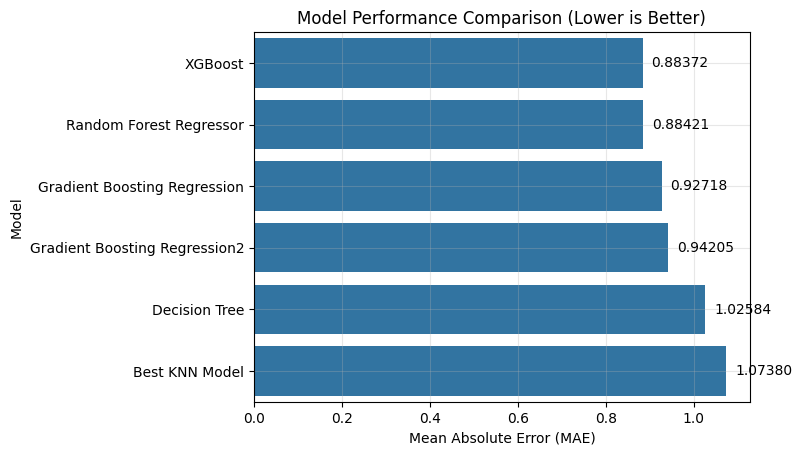

In [43]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(feature_bank.items()), columns=['Model', 'MAE'])

# Sort the DataFrame by MAE
df_sorted = df.sort_values('MAE')

# Create the bar plot
ax = sns.barplot(x='MAE', y='Model', data=df_sorted)

plt.title('Model Performance Comparison (Lower is Better)')
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Model')

# Loop over the bars and use plt.text() to display the MAE value on each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.02,  # x-coordinate position of text
             p.get_y() + p.get_height() / 2,  # y-coordinate position of text
             '{:1.5f}'.format(width),  # Text to be displayed
             va='center')  # Center alignment of text

plt.grid(alpha=0.3)
plt.show()

<hr>

<h4>06 Model Training</h4>

In [53]:
x = []
src2 = r'C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\test\test'
for file in os.listdir(src2):
    print(os.path.join(src2,file))
    x.append(pd.read_csv(os.path.join(src2,file)))
x = pd.concat(x)
x = x.fillna(0)
x

C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\test\test\set02.csv
C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\test\test\set09.csv


,index,time,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,02_1,04:11:15.736838+00,46.2,30.7,65.53,8.79,0.0,0.0,1.3,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
1,02_2,04:13:15.740386+00,46.0,31.4,65.53,8.26,0.0,0.0,0.0,1.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
2,02_3,04:15:17.720768+00,44.4,32.2,65.53,8.66,0.0,0.0,1.0,2.0,22.3,0.11,7.9,21.0,95.0,88.0,0.0,0.0
3,02_4,04:17:15.750584+00,43.0,33.0,65.53,8.68,0.0,0.0,0.0,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
4,02_5,04:19:15.75123+00,42.4,32.9,65.53,8.86,0.0,0.0,0.0,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,09_112,07:20:44.482378+00,36.2,35.9,0.00,53.35,0.0,0.0,0.0,3.0,23.7,0.12,4.9,27.0,110.0,103.0,48.0,0.0
112,09_113,07:22:46.459288+00,39.8,35.9,0.00,54.13,0.0,0.0,1.9,0.0,23.7,0.12,4.9,27.0,110.0,103.0,0.0,0.0
113,09_114,07:24:44.482942+00,38.4,35.8,0.00,54.11,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.0,110.0,103.0,48.0,0.0
114,09_115,07:26:44.533862+00,38.2,35.6,0.00,54.26,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.0,110.0,103.0,45.0,0.0


In [54]:
X.columns

Index(['26P', '23SoilEC', '26K', '26N', '1AirTemperature', '1LightLow',
       '13WindDirection', '1LightHigh', '23SoilpH', '1Air Humidity',
       '29SoilTension', 'flow1'],
      dtype='object')

In [55]:
x = x[X.columns]
x

,26P,23SoilEC,26K,26N,1AirTemperature,1LightLow,13WindDirection,1LightHigh,23SoilpH,1Air Humidity,29SoilTension,flow1
0,95.0,0.11,88.0,21.0,30.7,8.79,2.0,65.53,7.9,46.2,26.0,0.0
1,95.0,0.11,88.0,21.0,31.4,8.26,1.0,65.53,7.9,46.0,26.0,0.0
2,95.0,0.11,88.0,21.0,32.2,8.66,2.0,65.53,7.9,44.4,0.0,0.0
3,95.0,0.11,88.0,21.0,33.0,8.68,2.0,65.53,7.9,43.0,26.0,0.0
4,95.0,0.11,88.0,21.0,32.9,8.86,2.0,65.53,7.9,42.4,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
111,110.0,0.12,103.0,27.0,35.9,53.35,3.0,0.00,4.9,36.2,48.0,0.0
112,110.0,0.12,103.0,27.0,35.9,54.13,0.0,0.00,4.9,39.8,0.0,0.0
113,110.0,0.12,103.0,27.0,35.8,54.11,1.0,0.00,4.9,38.4,48.0,0.0
114,110.0,0.12,103.0,27.0,35.6,54.26,1.0,0.00,4.9,38.2,45.0,0.0


In [47]:
# scaler = RobustScaler()
# x_test = scaler.fit_transform(x_test)
# x_test = scaler.transform(x_test)
# x_test = pd.DataFrame(x_test, columns=[cols])

In [56]:
y = xgb_best.predict(x)
y

array([36.400105, 36.38288 , 36.195107, 36.30095 , 36.25564 , 36.043453,
       36.300156, 36.25564 , 35.86537 , 35.738644, 35.84481 , 35.958397,
       36.3539  , 35.900017, 36.282135, 37.509235, 36.957172, 47.314358,
       47.697216, 52.1698  , 50.315826, 54.46301 , 53.999477, 54.052128,
       54.212776, 53.9442  , 51.897396, 54.409866, 53.9363  , 44.348564,
       53.440052, 44.57443 , 55.45051 , 55.920746, 55.41974 , 53.536606,
       54.985756, 54.647743, 52.82695 , 52.74383 , 45.581886, 55.075863,
       51.324715, 55.457527, 55.204025, 55.187603, 55.388115, 54.86432 ,
       45.677055, 48.774845, 55.579556, 55.40427 , 55.49275 , 53.92441 ,
       52.35118 , 51.619816, 54.37854 , 53.62255 , 53.933933, 54.263554,
       43.715042, 51.702633, 33.57187 , 38.808193, 39.66338 , 33.82742 ,
       38.75944 , 39.042473, 39.08356 , 39.09641 , 39.172306, 39.40532 ,
       39.957584, 40.60948 , 40.401657, 40.443645, 38.562893, 34.116096,
       39.67019 , 38.904358, 39.245274, 39.07005 , 

In [57]:
len(y)

229

<hr>

<h4>07 Create SSV</h4>

In [58]:
submission = pd.read_csv(r'C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\sample_submission.csv')
submission

,index,23SoilWC ค.ชื้นดิน
0,02_1,31.1
1,02_2,NaN
2,02_3,NaN
3,02_4,NaN
4,02_5,NaN
...,...,...
224,09_112,NaN
225,09_113,NaN
226,09_114,NaN
227,09_115,NaN


In [59]:
submission['23SoilWC ค.ชื้นดิน'].iloc[1:] = y[1:]
submission

,index,23SoilWC ค.ชื้นดิน
0,02_1,31.100000
1,02_2,36.382881
2,02_3,36.195107
3,02_4,36.300949
4,02_5,36.255638
...,...,...
224,09_112,50.533211
225,09_113,49.350685
226,09_114,50.436817
227,09_115,50.436817


In [52]:
submission.to_csv('v.0.1.0.csv',index=False)